In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
from scipy.stats import norm
import statistics
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('./data_1000x200.csv')
df = df.drop(columns=['Unnamed: 0'])

#print(df)#[df['car_amount'] == 11]['datacollector'].values)
df['datacollector'] = df['datacollector'].map(ast.literal_eval)
df['datacollector'] = df['datacollector'].apply(lambda d: list(d.values()))

In [4]:
df.columns

Index(['car_amount', 'speeding_percentage', 'maximum_speeding', 'Run',
       'datacollector', 'height', 'width', 'brake_prob'],
      dtype='object')

In [5]:
df = df[df['car_amount'] != 1]

In [6]:
df.head(5)

,car_amount,speeding_percentage,maximum_speeding,Run,datacollector,height,width,brake_prob
52000,5,1,1,52000,"[1.4, 2.0, 3.0, 4.0, 5.0, 5.0, 4.8, 5.2, 5.0, ...",100,100,0.1
52001,5,1,1,52001,"[1.8, 2.8, 3.8, 4.8, 5.2, 5.0, 5.2, 5.2, 5.0, ...",100,100,0.1
52002,5,1,1,52002,"[1.8, 2.6, 3.6, 4.4, 4.4, 4.4, 4.6, 4.8, 5.2, ...",100,100,0.1
52003,5,1,1,52003,"[2.0, 3.0, 4.0, 4.8, 5.2, 5.0, 4.8, 5.0, 5.2, ...",100,100,0.1
52004,5,1,1,52004,"[2.0, 2.8, 3.6, 4.4, 4.8, 5.2, 5.2, 5.0, 5.0, ...",100,100,0.1


In [7]:
len(df['datacollector'].iloc[1])

200

/Users/johanvandeglind/opt/anaconda3/envs/simulation_programming/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: 'list' object has no attribute 'plot'

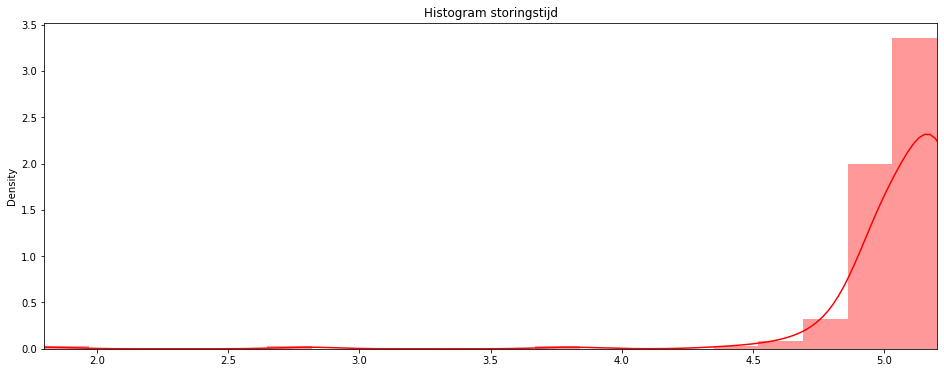

In [8]:
storingstijd = df['datacollector'].iloc[1]
plt.figure(figsize=(16, 6))
plt.title(label="Histogram storingstijd")
plt.xlim(np.min(storingstijd), np.max(storingstijd))
sns.distplot(storingstijd, kde=True, color='red', bins=20)                      
ax = storingstijd.plot.kde()

In [150]:
df_tmp = df.copy()
df_tmp.drop(columns=['height','width','brake_prob'],inplace=True)
df_tmp['datacollector'] = df_tmp['datacollector'].apply(lambda d: d[25:])

In [63]:
# (df_tmp[(df_tmp['car_amount'] == 15)&\
#     (df_tmp['speeding_percentage'] == 5)&\
#     (df_tmp['maximum_speeding'] == 1)]['datacollector'].values)

In [151]:
groups = df_tmp.groupby(['car_amount','speeding_percentage','maximum_speeding'])

In [152]:
means = {}
for group in groups:
    arr =list(group[1]['datacollector'].values)
    means[group[0]]=np.mean(arr, axis = 0)


In [166]:
# df_means = pd.DataFrame()
# for group in groups:
#     df_means['car_amount'] = group[0][0]
#     df_means['speeding_percentage'] = group[0][1]
#     df_means['maximum_speeding'] = group[0][2]
#     arr =list(group[1]['datacollector'].values)
#     df_means['means'][df] = list(np.mean(arr, axis = 0))
# print(df_means.head())

In [153]:
print(next(iter(means)),means[next(iter(means))])
(15, 1, 1)

(5, 1, 1) [5.1018 5.0952 5.0916 5.0964 5.09   5.0948 5.0912 5.0968 5.0972 5.0928
 5.0984 5.084  5.095  5.0956 5.0976 5.0906 5.0962 5.0974 5.0974 5.0894
 5.0888 5.0998 5.0966 5.091  5.085  5.0928 5.0942 5.0962 5.0988 5.0894
 5.0978 5.1016 5.0892 5.097  5.094  5.0966 5.098  5.1004 5.099  5.0902
 5.0942 5.1    5.0924 5.0974 5.0868 5.0944 5.1004 5.0864 5.0936 5.0972
 5.0966 5.099  5.0944 5.0982 5.0862 5.095  5.0934 5.0974 5.0938 5.0912
 5.0938 5.0972 5.0992 5.0906 5.106  5.0962 5.0992 5.098  5.0948 5.0938
 5.0918 5.1018 5.0968 5.0922 5.094  5.0928 5.0978 5.0972 5.0912 5.1026
 5.0968 5.0974 5.089  5.0874 5.0972 5.0906 5.0966 5.0978 5.0924 5.0904
 5.0954 5.0986 5.101  5.1036 5.0962 5.0978 5.0954 5.089  5.0896 5.0922
 5.0952 5.0898 5.0988 5.0994 5.0934 5.0952 5.1016 5.0976 5.0896 5.0898
 5.09   5.0886 5.0972 5.1038 5.0988 5.1042 5.0984 5.0988 5.1068 5.0964
 5.093  5.0978 5.095  5.0872 5.0844 5.0974 5.0976 5.0952 5.0908 5.0928
 5.0988 5.088  5.0914 5.0862 5.0972 5.096  5.0844 5.092  5.0938 5.0

(15, 1, 1)

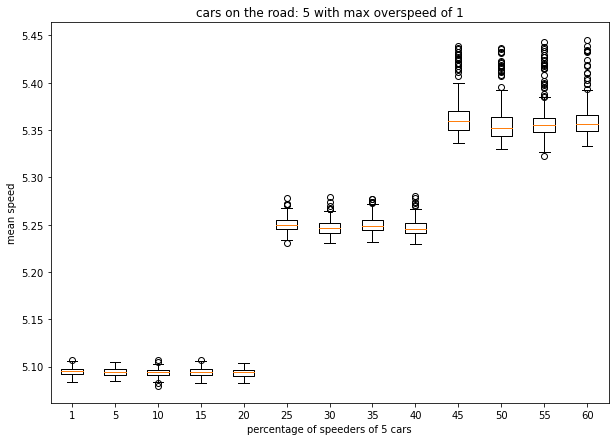

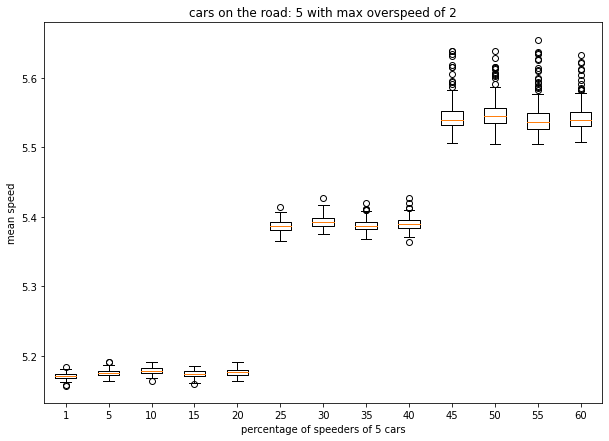

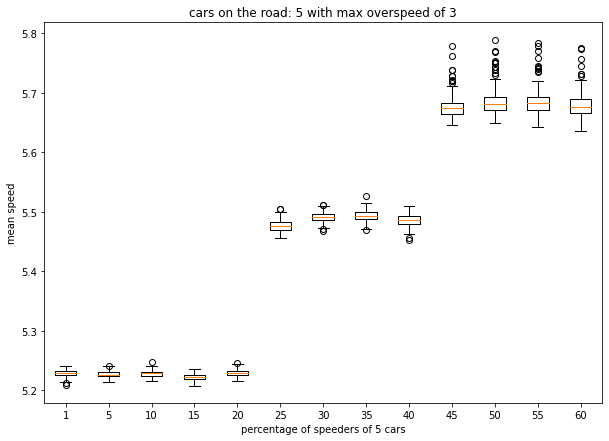

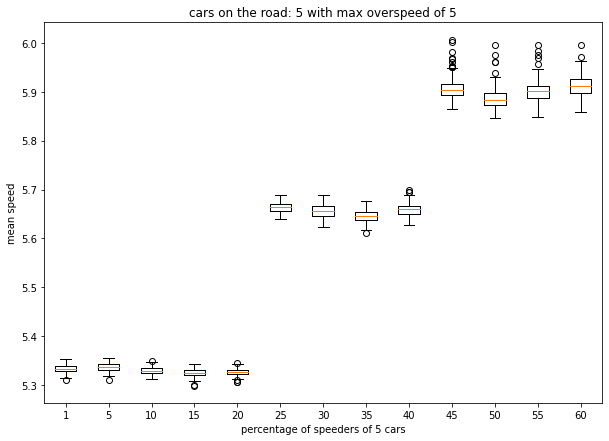

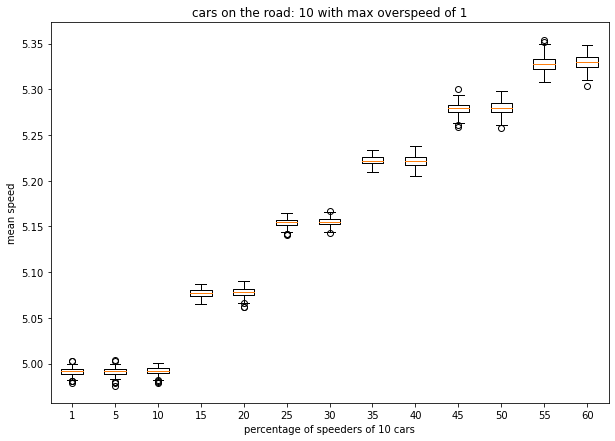

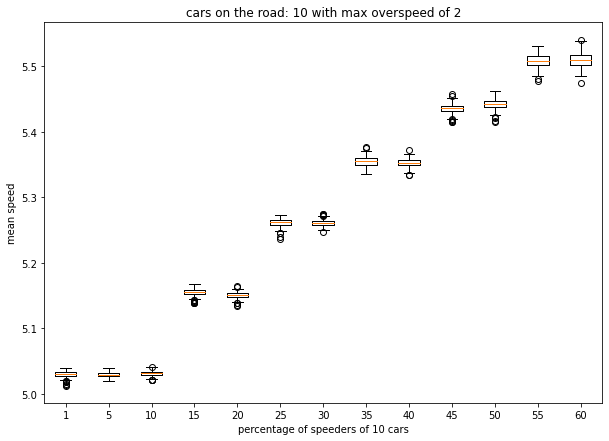

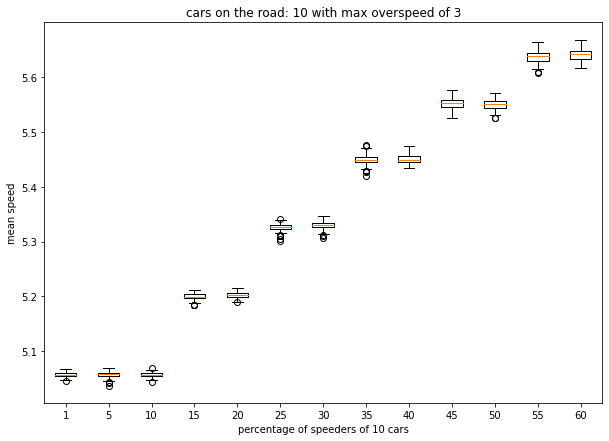

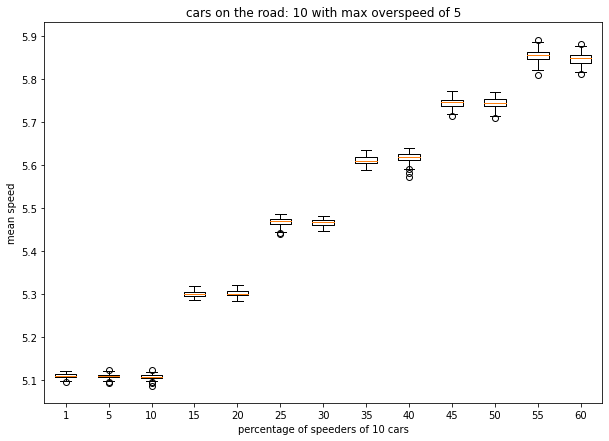

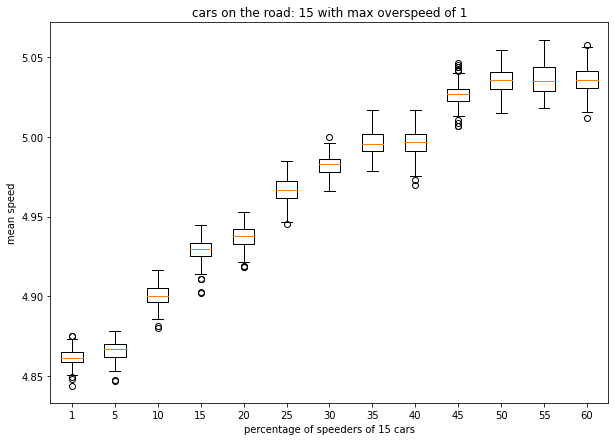

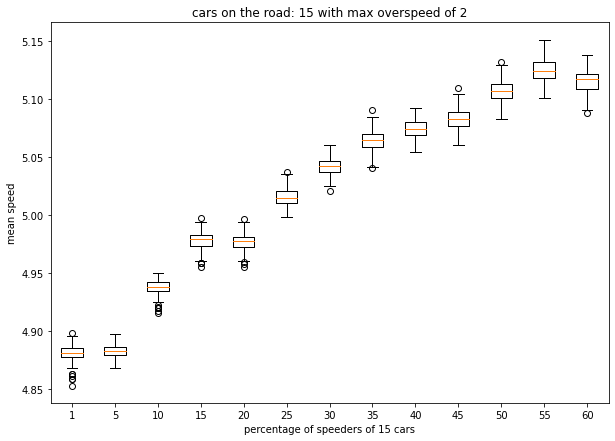

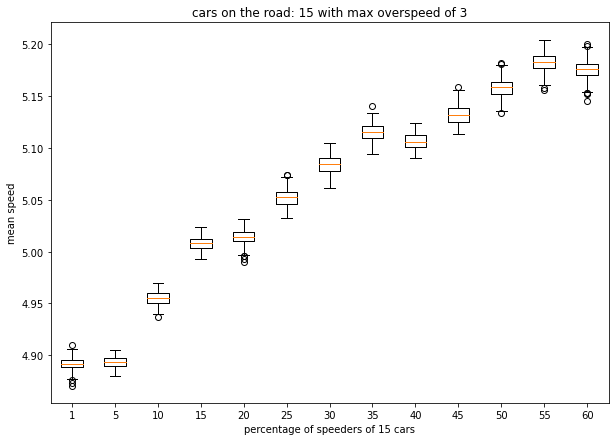

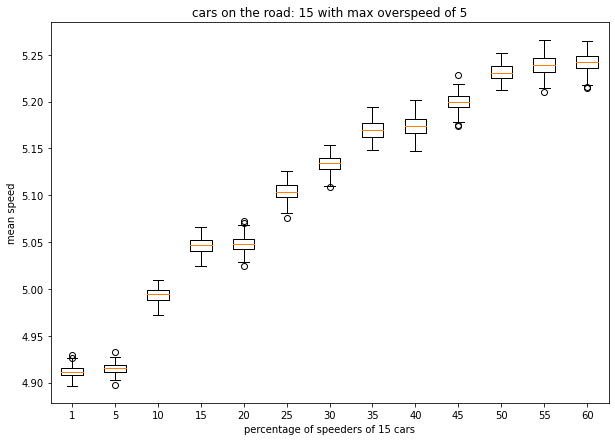

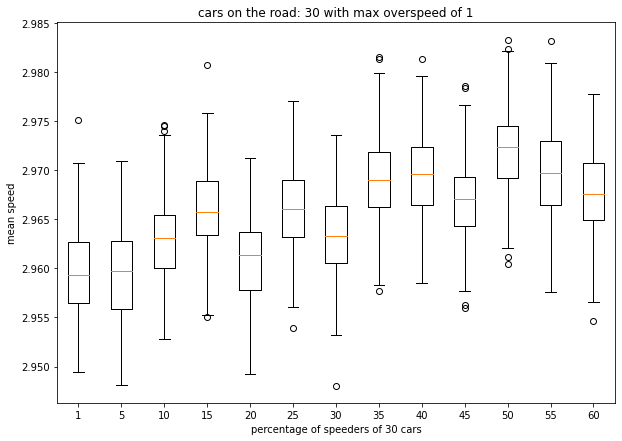

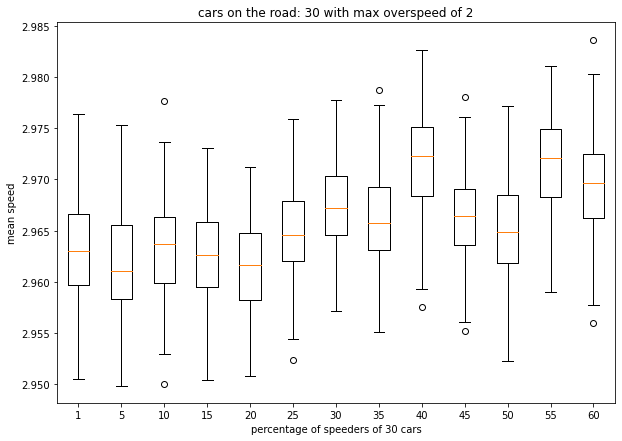

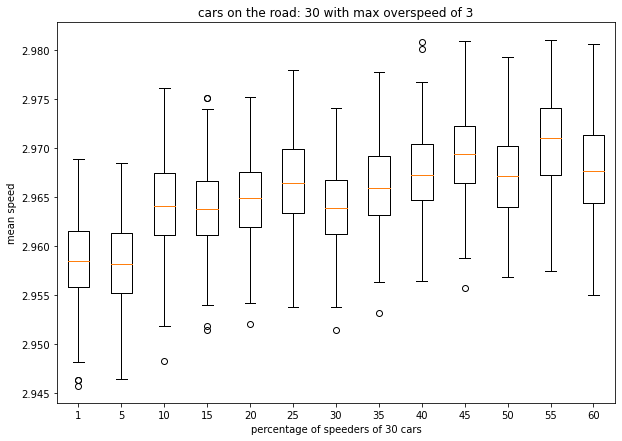

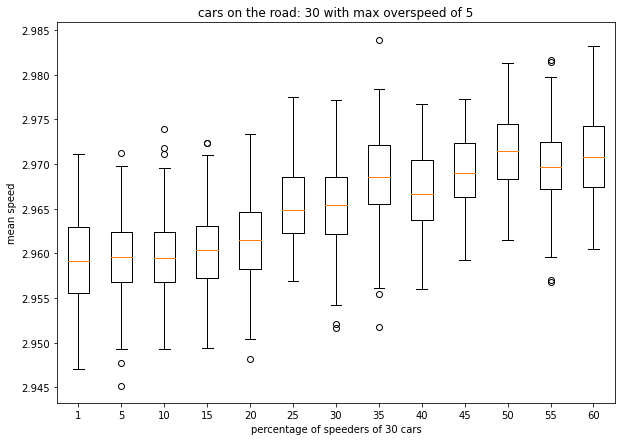

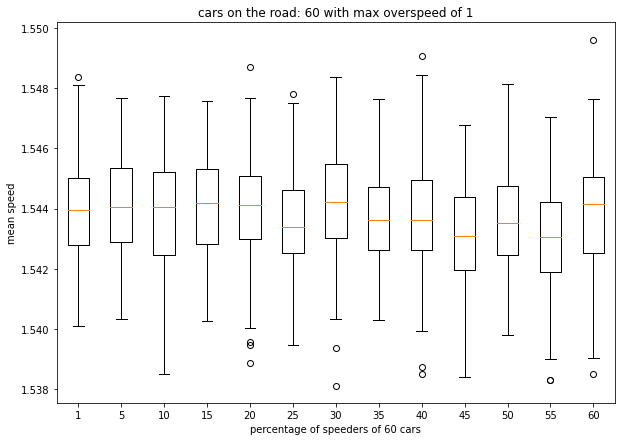

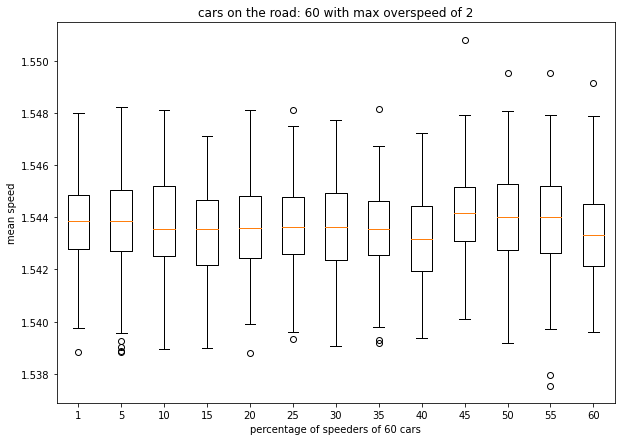

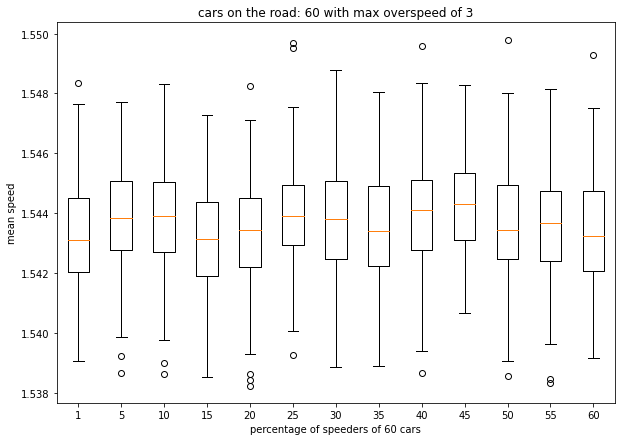

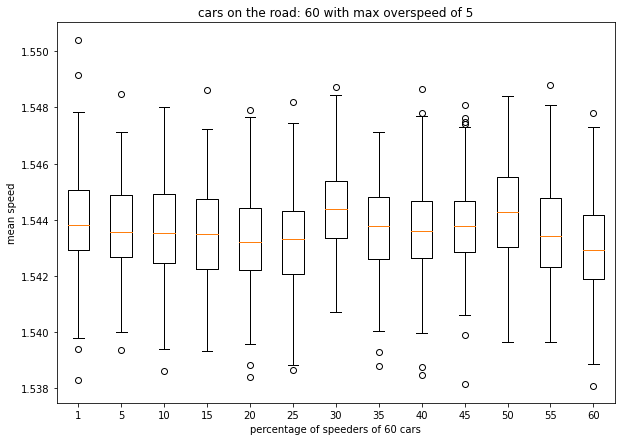

In [197]:
car_amount = [5,10,15,30,60]
maximum_speeding= [1,2,3,5]
for cars in car_amount:
    for overspeed in maximum_speeding:
        values = []
        keys = []
        for key,value in means.items():
             if key[0] == cars and key[2] == overspeed:
                    values.append(value)
                    keys.append(key[1])

        plt.figure(figsize =(10, 7))        
        #plt.xticks(rotation = 45)
        plt.boxplot(values, labels=keys) 
        plt.ylabel(f'mean speed')
        plt.xlabel(f'percentage of speeders of {cars} cars')
        plt.title(f'cars on the road: {cars} with max overspeed of {overspeed}')
        plt.show()



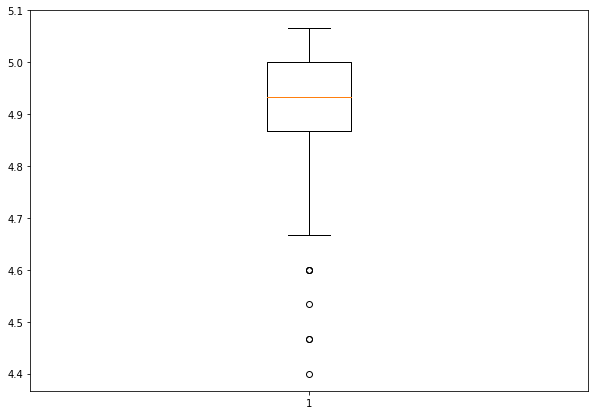

In [62]:
fig = plt.figure(figsize =(10, 7))
 

plt.boxplot(df_tmp[(df_tmp['car_amount'] == 15)&\
    (df_tmp['speeding_percentage'] == 5)&\
    (df_tmp['maximum_speeding'] == 1)]['datacollector'].values[0])
 
# show plot
plt.show()

In [ ]:
df_tmp

In [ ]:
#plt.show()
def plot_list_fd(x_axis):
    mean = statistics.mean(x_axis)
    sd = statistics.stdev(x_axis)
    plt.plot(x_axis, norm.pdf(x_axis, mean, sd))


fig, axs = plt.subplots(len(df[(df['car_amount'] == 15)]['datacollector'].values),1, figsize=(20, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
z= 0
speed_pers = [1,5,10,15,20,25,30,35,40,45,50,55,60]
car_amount = [1,5,10,15,30,60]
maximum_speeding= [1,2,3,5]
means = {}
for cars in car_amount:
    for max_speeding in maximum_speeding:
        for speed in speed_pres:
            for data in df[(df['car_amount'] == cars)&\
                        (df['speeding_percentage'] == speed)&\
                        (df['maximum_speeding'] == max_speeding)]['datacollector'].values:
                means.append()

In [ ]:
z = 0
for i in df[(df['car_amount'] == 15)&(df['speeding percentage'] == speed)]['datacollector'].values:
    axs[z].set_title(f'speeding percentage: {speed_pers[z]}%')
    axs[z].plot(i)
    axs[z].set_ylim([0, 8])
    z=z+1

In [ ]:
x =
y =
slope, intercept, r, p, se = linregress(x, y)